<a href="https://colab.research.google.com/github/rizkyarif12/PCVK_Ganjil_2024/blob/main/Week7_Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Buatlah fungsi konvolusi menggunakan algoritma yang telah dijelaskan pada Bagian C, tanpa
menggunakan library atau metode konvolusi dari OpenCV.

# 2. Berikut merupakan langkah-langkah yang dapat dilakukan:

a. Buat notebook baru pada google colab, dan beri nama Week7.ipynb. Simpan Salinan
pada akun github seperti pada modul sebelumnya.

b. Akses file yang terdapat pada drive dan import beberapa library yang dibutuhkan

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

c. Buatlah fungsi konvolusi. Catatan: parameter yang digunakan boleh dimodifikasi.
Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel, dan
padding.


In [10]:
def convolution2D(image, kernel, padding=0):
    # Mendapatkan dimensi gambar dan kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Menentukan dimensi output
    output_height = image_height + 2 * padding - kernel_height + 1
    output_width = image_width + 2 * padding - kernel_width + 1

    # Menambahkan padding pada gambar
    if padding > 0:
        image_padded = np.pad(image, [(padding, padding), (padding, padding)], mode='constant')
    else:
        image_padded = image

    # Inisialisasi output
    output = np.zeros((output_height, output_width))

    # Melakukan konvolusi
    for y in range(output_height):
        for x in range(output_width):
            output[y, x] = np.sum(kernel * image_padded[y:y+kernel_height, x:x+kernel_width])

    return output


d. Load citra yang akan diproses dan ubah menjadi citra keabuan

In [11]:
# Menggunakan OpenCV untuk load gambar
image_path = '/content/drive/MyDrive/AssetsPCVK/female.jpg'
image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)


e. Tentukan kernel yang akan digunakan, contohnya kernel untuk filter sharpening
sebagai berikut: <br>
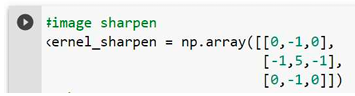

In [12]:
# Contoh kernel untuk sharpening
sharpening_kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

f. Memanggil fungsi konvolusi yang telah dibuat sebelumnya, dan menampilkan hasil
konvolusinya:

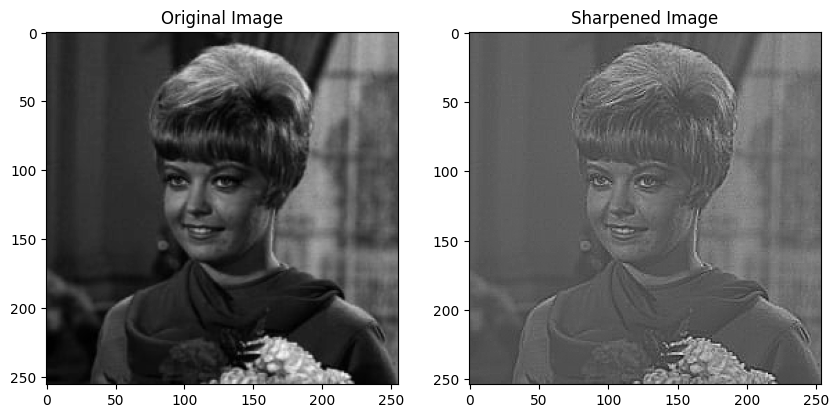

In [13]:
# Memanggil fungsi konvolusi dan menampilkan hasil
output_image = convolution2D(image, sharpening_kernel)

# Menampilkan hasil
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Sharpened Image')
plt.imshow(output_image, cmap='gray')
plt.show()


# 3. Buat Image Filter untuk Average filter, low pass filter, high pass filter, dan beberapa filter

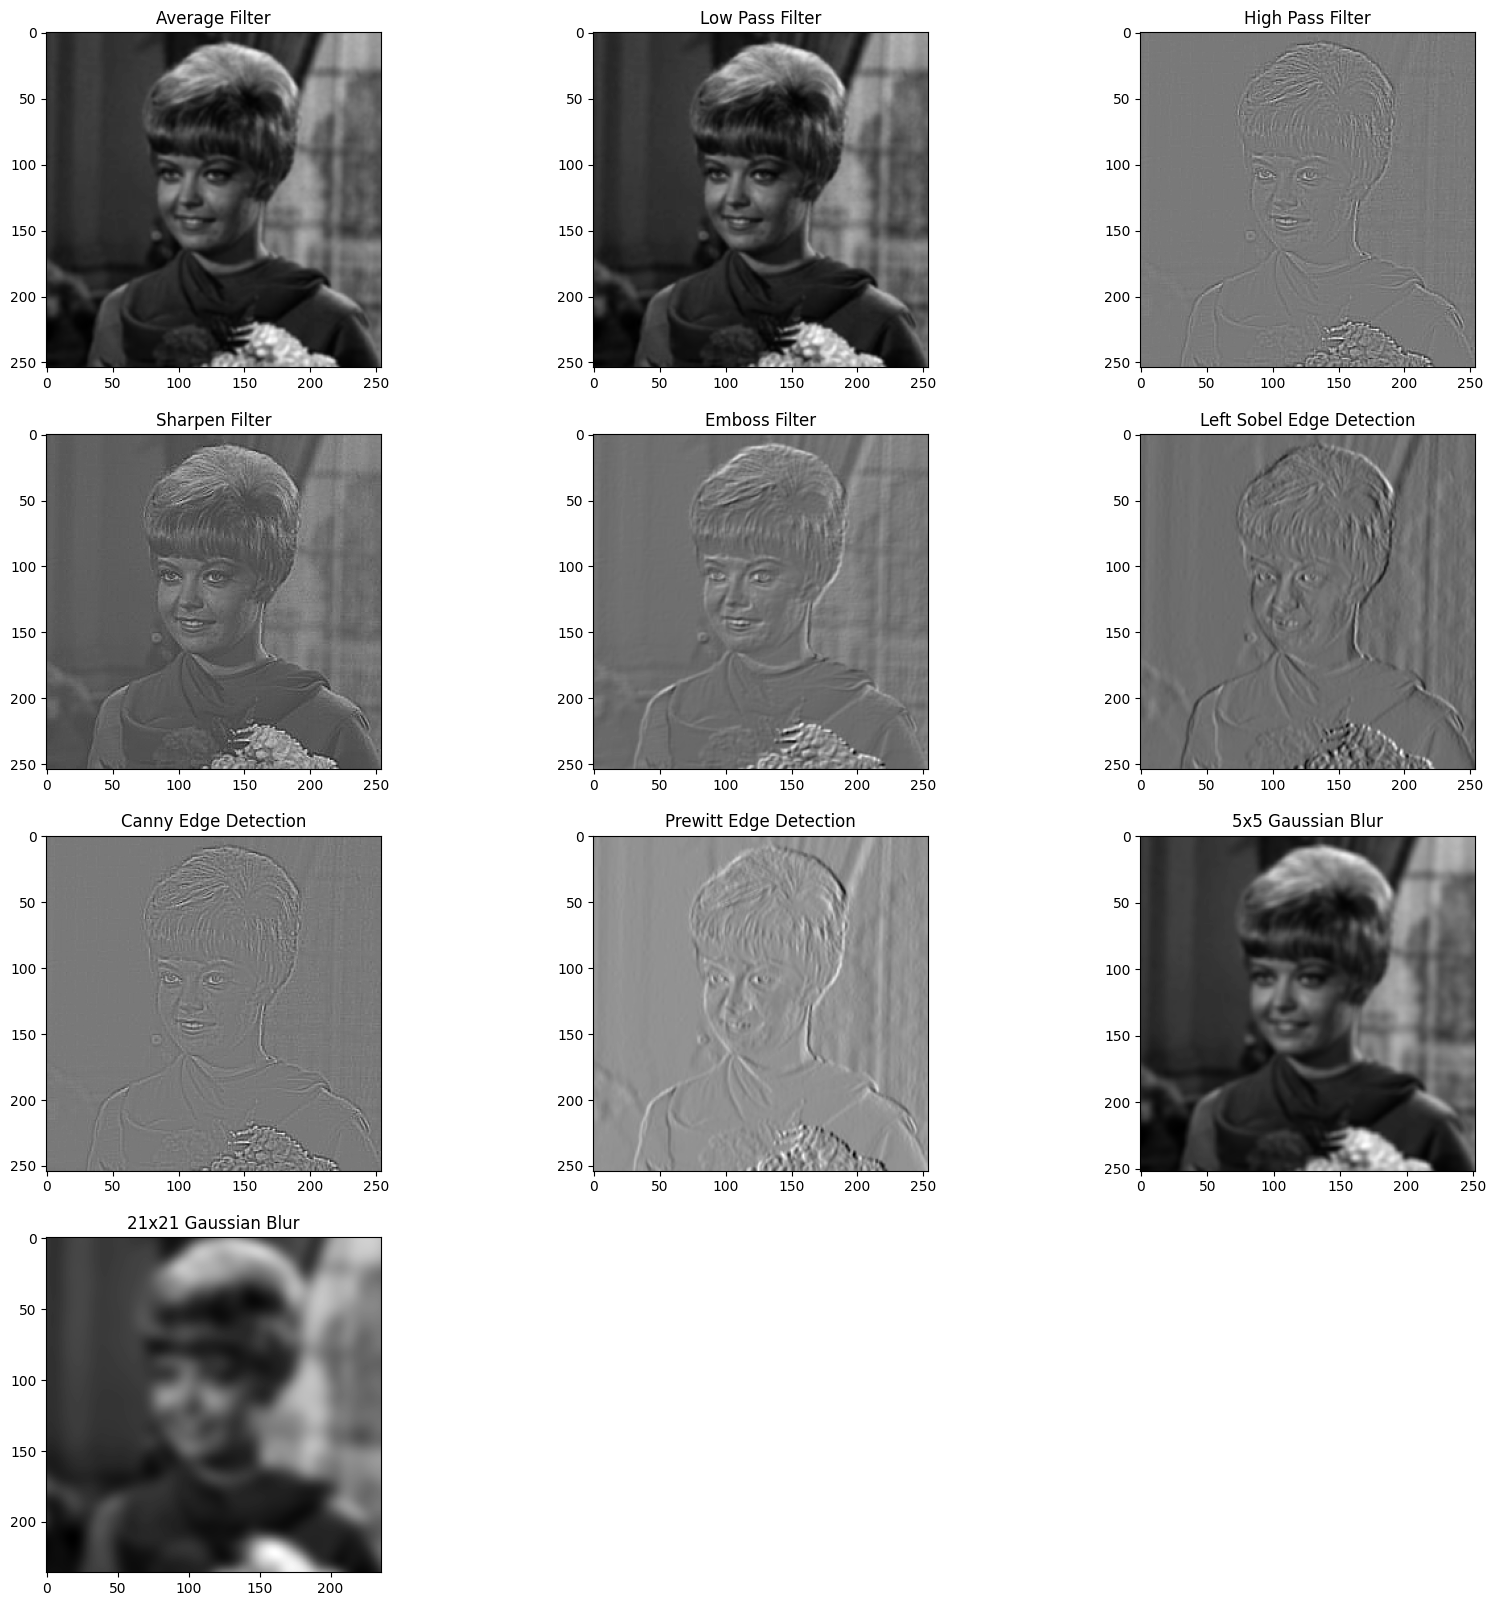

In [16]:
# Definisikan beberapa kernel filter
sharpening_kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])
average_kernel = np.ones((3, 3), np.float32) / 9
low_pass_kernel = np.array([
    [1, 1, 1],
    [1, 4, 1],
    [1, 1, 1]
]) / 12
high_pass_kernel = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])
emboss_kernel = np.array([
    [-2, -1, 0],
    [-1, 1, 1],
    [0, 1, 2]
])

left_sobel_kernel = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
])

canny_edge_detection_kernel = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])

prewitt_edge_detection_kernel = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])

# Gaussian blur dengan ukuran kernel 5x5 dan 21x21
gaussian_5x5_kernel = cv.getGaussianKernel(5, math.sqrt(5))
gaussian_5x5_kernel = gaussian_5x5_kernel @ gaussian_5x5_kernel.T

gaussian_21x21_kernel = cv.getGaussianKernel(21, math.sqrt(21))
gaussian_21x21_kernel = gaussian_21x21_kernel @ gaussian_21x21_kernel.T

# Melakukan konvolusi untuk setiap filter
average_image = convolution2D(image, average_kernel)
low_pass_image = convolution2D(image, low_pass_kernel)
high_pass_image = convolution2D(image, high_pass_kernel)
sharpened_image = convolution2D(image, sharpening_kernel)
emboss_image = convolution2D(image, emboss_kernel)
left_sobel_image = convolution2D(image, left_sobel_kernel)
canny_image = convolution2D(image, canny_edge_detection_kernel)
prewitt_image = convolution2D(image, prewitt_edge_detection_kernel)
gaussian_5x5_image = convolution2D(image, gaussian_5x5_kernel)
gaussian_21x21_image = convolution2D(image, gaussian_21x21_kernel)

# Menampilkan hasil
filters = {
    "Average Filter": average_image,
    "Low Pass Filter": low_pass_image,
    "High Pass Filter": high_pass_image,
    "Sharpen Filter": sharpened_image,
    "Emboss Filter": emboss_image,
    "Left Sobel Edge Detection": left_sobel_image,
    "Canny Edge Detection": canny_image,
    "Prewitt Edge Detection": prewitt_image,
    "5x5 Gaussian Blur": gaussian_5x5_image,
    "21x21 Gaussian Blur": gaussian_21x21_image
}

plt.figure(figsize=(20, 20))
for i, (filter_name, filter_image) in enumerate(filters.items()):
    plt.subplot(4, 3, i+1)
    plt.title(filter_name)
    plt.imshow(filter_image, cmap='gray')
plt.show()